# Airline Customer Satisfaction prediction

<h1>Introduction</h1>
<hr>
<p style="text-align:justify;">Garud Airlines() is the flag carrier of Malaysia, based in Kuala Lumpur. The airline’s operational base is at Kuala Lumpur International Airport in Kuala Lumpur. Kuala Lumpur International Airport and Kuala Lumpur International Airport 2 is built to be Malaysia’s next generation international airport hub that allows seamless connectivity for both local and international low-cost & full-service carriers. The airline is the third largest in the middle east in terms of revenue, behind Andula and Queens Airways, It operates domestic and international scheduled flights to over 85 destinations in the middle east, Africa, Asia, Europe and North America.</p>

<h3>About The Dataset</h3>
<hr>
<p style="text-align:justify;">The data used for this case study is whether a customer is satisfied with the airlines or not after travelling with them which is a secondary dataset. The dataset was obtained from an online community of data scientists and machine learners and acts as a public data platform, Kaggle. It consists of survey results and demographic/personal information related to 129,880 customers. In total, there are 23 features. The target feature for this case is to predict whether a future customer</p>

<h3>Features</h3>
<ul>
    <li>Satisfaction-This is the column that indicate if the customer is satisfied or not with the overall airline service</li>
    <li>Gender-Detail about the gender of customer</li>
    <li>Customer Type-Indicates if a customer is loyal or not .i.e if the customer prefer the same airline in future travels or not</li>
    <li>Age-Displays the age of customers which is mainly between 7 to 85</li>
    <li>Type of Travel-Indicates if the customer has travelled for personal or business purpose</li>
    <li>Class-Type of class that person travelled in:Business/Economy/Others</li>
    <li>Flight Distance-It is total distance of travel from source to destination</li>
</ul>
The following Features are rated on a scale of 0 to 5
<ul>
    <li>Seat comfort</li>
    <li>Departure/Arrival time convenient</li>
    <li>Food & Drink</li>
    <li>Gate Location</li>
    <li>Inflight Wifi Service</li>
    <li>Inflight Entertainment</li>
    <li>Online Support</li>
    <li>Ease of Online booking</li>
    <li>Onboard Service</li>
    <li>Legroom Service</li>
    <li>Baggage Handling</li>
    <li>Checkin Service</li>
    <li>Cleanliness</li>
    <li>Online Boarding</li>
</ul>
And Delays in minutes
<ul>
    <li>Departure Delay in minutes</li>
    <li>Arrival Delay in minutes</li>
</ul>








In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



# Importing dataset into the pandas environment

In [4]:
data = pd.read_csv('Airline.csv')

Displaying the dataset

In [5]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
data.info() # showing basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

**This dataset contain 129880 records and 23 columns**

Here we can see a column <mark style="background-color:#e1fc7e;">'Satisfaction':</mark> this is our target column, our main objective of this study based on this column. Hence we can say that this is a classification problem

# Features Analysis

In [ ]:
data.dtypes # shows the data types of every features in this data

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
data.dtypes.value_counts() # shows the count of datatypes in this dataframe

int64      17
object      5
float64     1
dtype: int64

In this dataset there is a mix of different datatypes. such as object,int64 & float64.

categorical Features: satisfaction,Gender,Customer Type, Type of Travel, Class

Numerical Features : Age, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

Out of this entire features,14 are ratings given by customers on the <mark style="background-color:#e1fc7e;">scale of 0-5</mark>

# Descriptive Statistics 


The .describe() method will give you the statistics of the columns.

Here is the output:

In [ ]:
describeNum = data.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,129880.000000,39.427957,15.119360,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,129880.000000,1981.409055,1027.115606,50.000000,1359.000000,1925.000000,2544.000000,6951.000000
Seat comfort,129880.000000,2.838597,1.392983,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,129880.000000,2.990645,1.527224,0.000000,2.000000,3.000000,4.000000,5.000000
Food and drink,129880.000000,2.851994,1.443729,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,129880.000000,2.990422,1.305970,0.000000,2.000000,3.000000,4.000000,5.000000
Inflight wifi service,129880.000000,3.249130,1.318818,0.000000,2.000000,3.000000,4.000000,5.000000
Inflight entertainment,129880.000000,3.383477,1.346059,0.000000,2.000000,4.000000,4.000000,5.000000
Online support,129880.000000,3.519703,1.306511,0.000000,3.000000,4.000000,5.000000,5.000000
Ease of Online booking,129880.000000,3.472105,1.305560,0.000000,2.000000,4.000000,5.000000,5.000000


<hr style="height:1px;color:gray;">

# EDA
<hr style="height:1px;color:gray;">

#### Looking for Numerical Data

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=data.select_dtypes(include=numeric)
df_num.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


#### Looking for Categorical Data

In [ ]:
#This gives the columns that are categorical

df_cat=data.select_dtypes(include='object')
df_cat.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [ ]:
#This gives the columns that are categorical

list(data.select_dtypes('object').columns)

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
#printing all categorical columns with uniques values in them

for columns in data.select_dtypes('object').columns:        # loop for filtering categorical columns
 print('\n','column name           :',columns,'\n',
        'Number of Unique Value:',data[columns].nunique(),'\n',
        'Unique Values         :',data[columns].unique(),'\n','\n')


 column name           : satisfaction 
 Number of Unique Value: 2 
 Unique Values         : ['satisfied' 'dissatisfied'] 
 


 column name           : Gender 
 Number of Unique Value: 2 
 Unique Values         : ['Female' 'Male'] 
 


 column name           : Customer Type 
 Number of Unique Value: 2 
 Unique Values         : ['Loyal Customer' 'disloyal Customer'] 
 


 column name           : Type of Travel 
 Number of Unique Value: 2 
 Unique Values         : ['Personal Travel' 'Business travel'] 
 


 column name           : Class 
 Number of Unique Value: 3 
 Unique Values         : ['Eco' 'Business' 'Eco Plus'] 
 



#### Count of each unique values in each categorical features

In [ ]:
# loop for filtering categorical columns

for i in data.select_dtypes('object').columns:    
    
    # printing all categorical columns with uniques values count
    
  print(data[[i]].groupby(i).size(),'\n'+'------------------','\n')  

satisfaction
dissatisfied    58793
satisfied       71087
dtype: int64 
------------------ 

Gender
Female    65899
Male      63981
dtype: int64 
------------------ 

Customer Type
Loyal Customer       106100
disloyal Customer     23780
dtype: int64 
------------------ 

Type of Travel
Business travel    89693
Personal Travel    40187
dtype: int64 
------------------ 

Class
Business    62160
Eco         58309
Eco Plus     9411
dtype: int64 
------------------ 



<hr style="height:1px;color:gray;">

## Univariate Analysis & Bi-Variate Analysis


<hr style="height:1px;color:gray;">

In [ ]:
d1 = data.copy()

In [ ]:
d1['Gender/Class/CustomerType'] = d1['Gender'] +'-'+d1['Class'] +'-'+d1['Customer Type']
insight1 = d1.groupby(['Gender/Class/CustomerType','satisfaction']).agg({'Gender':'count'}).reset_index()
insight1.columns = ['Gender/Class/CustomerType','satisfaction','Customer']
insight1

,Gender/Class/CustomerType,satisfaction,Customer
0,Female-Business-Loyal Customer,dissatisfied,5843
1,Female-Business-Loyal Customer,satisfied,20651
2,Female-Business-disloyal Customer,dissatisfied,2891
3,Female-Business-disloyal Customer,satisfied,1878
4,Female-Eco Plus-Loyal Customer,dissatisfied,1434
5,Female-Eco Plus-Loyal Customer,satisfied,2811
6,Female-Eco Plus-disloyal Customer,dissatisfied,662
7,Female-Eco Plus-disloyal Customer,satisfied,59
8,Female-Eco-Loyal Customer,dissatisfied,5801
9,Female-Eco-Loyal Customer,satisfied,16516


In [ ]:
d2 = insight1['Gender/Class/CustomerType']
d3 = insight1['satisfaction']
d4 = insight1['Customer']

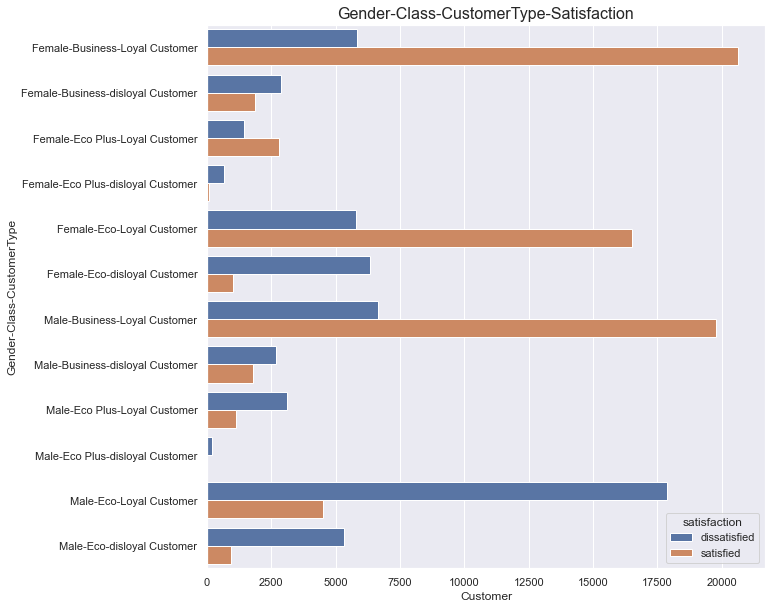

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Gender-Class-CustomerType-Satisfaction', fontsize = 16);
sns.barplot(x = d4, y = d2, hue = d3);
plt.ylabel('Gender-Class-CustomerType', fontsize = 12)
plt.xlabel('Customer', fontsize = 12);

**Barplot Conclusions :**

In Business Class, both Male and Female Loyal Customers have high Satisfaction

In Eco Class, Female Loyal Customers have higher Satisfaction compare to Male Loyal Customers.

In [ ]:
ins2 = data.copy()

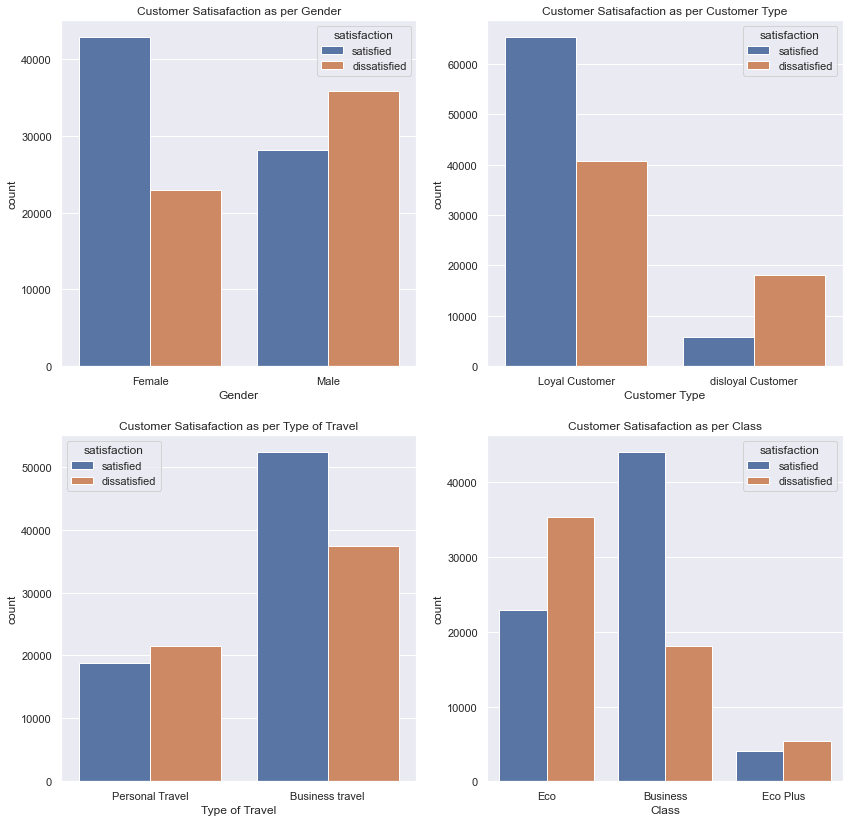

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sns.countplot(data=ins2,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    c+=1

Countplot conclusions :

Female Customers have higher satisfaction than Male Customers.

Loyal Customers have higher satisfaction than Disloyal Customers.

Business Travel has higher customer satisfaction than Personal Travel.

Business Class has the highest satisfaction between the 3 airlines classes.

#### initialising a function to draw the figure

In [ ]:
def figure(x,data): # function declaration
    fig=plt.figure(figsize=(8,6)) 
    ax=sns.countplot(x=x, data=data,palette='crest')
    for p in ax.patches:
      ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(data)*100).round(1))+'%)',
              (p.get_x()+0.1, p.get_height()-3000),color='white')
    label=list(data.filter([x]))
    plt.title('Passenger'+' '+label[0]+' '+'count',weight='bold',fontsize='15')
    plt.xlabel(label[0],weight='bold',fontsize='15')
    plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
    plt.show()

### No.of Satisfied & Dissatisfied customers 

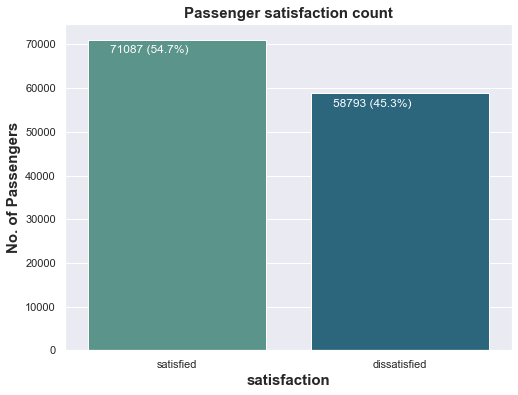

In [ ]:
figure('satisfaction',data)

Observations

This graph shows that 54.7% of travellers are satisfied and the rest are not satisfied.

Inference

From this observation,the majority of passengers are satisfied with their overall experience with the airline.

Conclusion

This indicates ,it is a balanced dataset as the distribution of both satisfied and dissatisfied customers falls in same range

### No.of passengers classified by Gender 

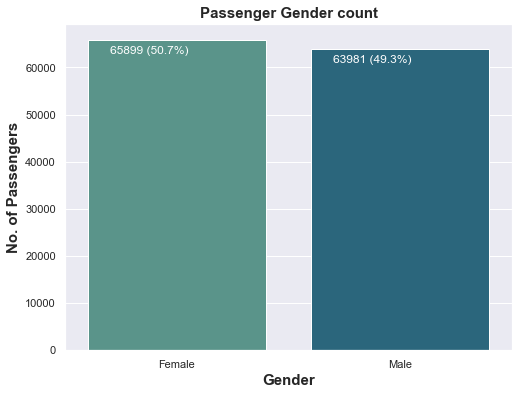

In [ ]:
figure('Gender',data)

Observations

This graph shows that the 50.7% are female passengers

Inference

From this observation,the no.of male and female passengers are almost equal

#### No.of passengers classified by Customer Type

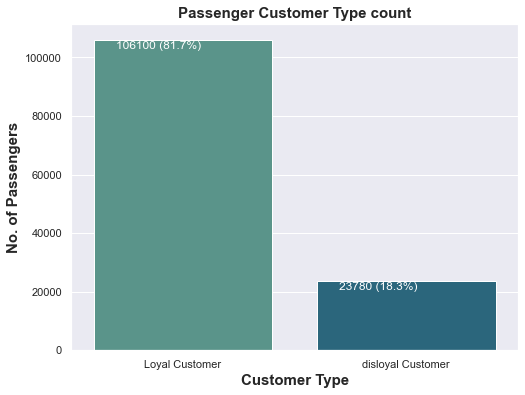

In [ ]:
figure('Customer Type',data)

Observations

This graph shows that the 81.7% are loyal customers

Inference

From this observation,the majority of customers are loyal

Conclusion

Since most of the customers are loyal,this may indicate that most of the customers are frequent travellers with this airline.

#### No.of passengers classified by Travel Class

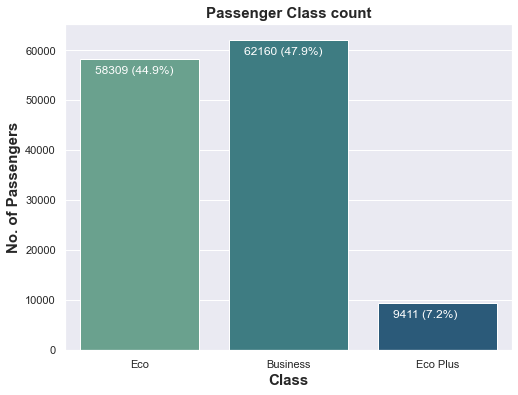

In [ ]:
figure('Class',data)

Observations

This graph shows that there are three types of classes and most of the travellers has chosen Business class

Inference

Both economy and business class travellers are almost equal whereas the customers who has chosen economical plus is very few

Conclusion

As this graph clearly shows the economical plus class is not choosen by most of customers and it can be due to high price compared to economy and less quality and service compared to price they pay.It is better to keep both economy and eco plus as a single class.

No.of passengers classified by Travel Type

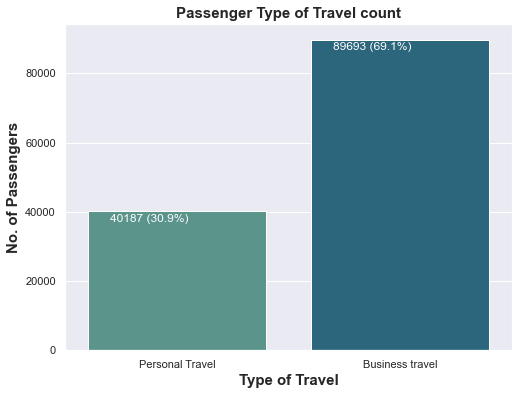

In [ ]:
figure('Type of Travel',data)

Observations

This graph shows that the 69.1% of passengers travelled for business purposes

Inference

From this observation,the majority of customers are business travellers

Conclusion

Since most of the passengers are choosing this airline for business travels,if we offer any discounts for them,their preference for our airline will be more.And we have to figure out why the customer's selection of our airline is less for personal travel and for that we need more insights



### Initialising a function to draw the Bivariate figures

In [ ]:
def figure_bv(x,y,data):
    fig=plt.figure(figsize=(12,10))
    ax=sns.countplot(x=x,hue=y, data=data,palette='crest')
    for p in ax.patches:
      ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(data)*100).round(1))+'%)',
              (p.get_x(), p.get_height()),color='black',size=12)
    lable=list(data.filter([x,y]))
    plt.title(lable[0]+' and '+lable[1],weight='bold',fontsize='15')
    plt.xlabel(lable[0],weight='bold',fontsize='15')
    plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
    plt.show()

No.of Customers Type classified by Gender

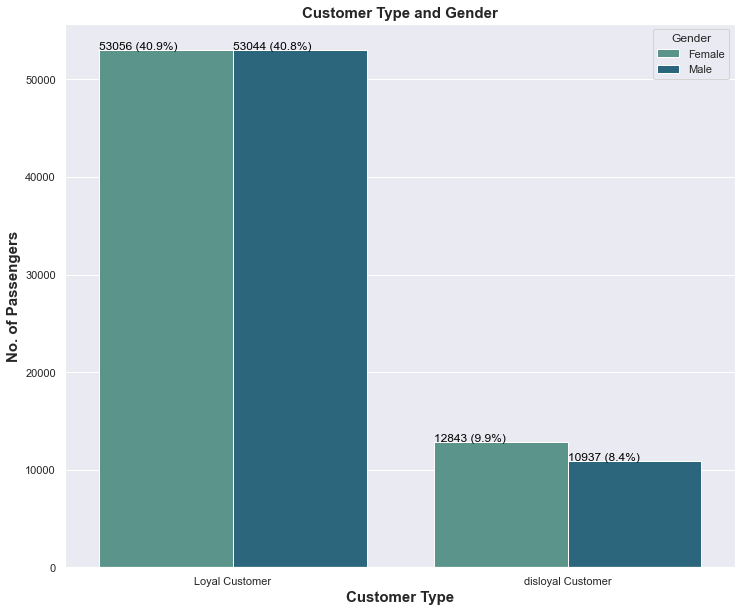

In [ ]:
figure_bv('Customer Type','Gender',data)

observation
In this figure we can see that , 80% of passengers both Female & male are Loyal to this airline

Inferences
Among the passengers,there is a chance that this Loyal Customer are frequent trvellers with this airline. And the disloyal customers may be the first time traveller by this airline or disatisfied customers

### Passengers travel type classified by Gender

In [3]:
figure_bv('Type of Travel','Gender',data)

NameError: ignored

Observations
Passengers who travelled for business purposes among male and female are 33.8% and 35.3% respectively

Inference
Business travellers are more and equal among both gender and its interesting to see most of the business travellers are females

Passengers Travel Class classified by Gender

In [4]:
figure_bv('Class','Gender',data)

NameError: ignored

Observations
Business class travellers are 24.1% & 23.8% among female & male and the other two class has less travellers compared to this

Inference
Business class travellers are more and almost equal among both gender.Economy stands the next with almost similiar range of customers.But economical Plus has very few travellers only

Passenger Satisfaction classified by Class of Travel

In [ ]:
figure_bv('Class','satisfaction',data)

Observations
34% of business class travelers are satisfied and 13.9% ARE dissatisfied with business class.Also 27.2% of economy class are dissatisfied and only 17.7% are satisfied in economy class.In Eco plus,almost 3.1% are satisfied.

Inference
Majority of business class travellers are satisfied whereas economy class passengers are dissatisfied

Conclusion
Have to take necessary actions to make economy class passengers satisfied by improving the services and quality

Plot of Satisfaction based on seat comfort

In [ ]:
figure_bv('Seat comfort','satisfaction',data)

Inference
we can see that as the seat comfort increases,satisfaction among customers also increases.Customers with lowest seat comfort are tend to be dissatisfied.

InFlight Entertinement Vs Satisfaction

In [ ]:
figure_bv('Inflight entertainment','satisfaction',data)

Inference
As inflight entertainment is provided more,the customer satisfaction increases as well.When inflight entertainment provided is less,satisfaction tends to decrease

Cleanliness Vs Satisfation

In [ ]:
figure_bv('Cleanliness','satisfaction',data)

Inference
As flight is rated more clean,the passenger satisfaction also increases and vice versa

In [ ]:
from joypy import joyplot

In [ ]:
plt.figure()

joyplot(data=data[['satisfaction', 'Flight Distance']], by='satisfaction',color=['#686de0', '#eb4d4b'],figsize=(12, 8))
plt.title('Passenger Satisfaction & Flight Distance', fontsize=20,weight='bold')
plt.xlabel('Flight Distance',weight='bold',fontsize='15')
plt.show()

We also look at another interesting plot that shows the satisfaction level based on the miles travelled by a passenger. One would assume that customers on longer flights would tend to be more dissatisfied, due to travel fatigue or boredom. However, that is not the case as per the graph. Clearly customers travelling 2000–3000 miles are equally likely to be satisfied or dissatisfied.

In [ ]:
gdata = data.copy()
df2 = gdata[['satisfaction','Gender']]

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
#creating an insatance of properties
props={}
props[('satisfied','Female')]={'facecolor':'#4DBEEE', 'edgecolor':'white'}
props[('dissatisfied','Female')]={'facecolor':'#C1CDCD', 'edgecolor':'white'}
props[('satisfied','Male')]={'facecolor':'#FFEFDB','edgecolor':'white'}
props[('dissatisfied','Male')]={'facecolor':'#98F5FF','edgecolor':'white'}
labelizer=lambda k:{('satisfied','Female'):str(len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Female")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Female")])/len(data)*100),2))+'%)',
                    ('dissatisfied','Female'):str(len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Female")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Female")])/len(data)*100),2))+'%)',
                    ('satisfied','Male'):str(len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Male")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "satisfied") & (df2["Gender"] == "Male")])/len(data)*100),2))+'%)',
                    ('dissatisfied','Male'):str(len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Male")]))+
                    ' ('+str(round((len(df2[(df2["satisfaction"] == "dissatisfied") & (df2["Gender"] == "Male")])/len(data)*100),2))+'%)'}[k]

plt.figure(figsize=(10,8))
mc=mosaic(data=data, index=['satisfaction', 'Gender'],labelizer=labelizer,properties=props)
plt.title('Satisfaction Gender Wise',weight='bold',fontsize='15')
plt.show()

**observation**

In this figure we can see that satisfied Female passengers are 33.05% and dissatisfied female passengers are 17.69%

**Inferences**

Among the passengers, majority of the satisfied cutomers are Females and its evident that no.of Male passengers that are dissatisfied is more than satisfied  ones with this airline services.

Further investigations are required to figure out the reasons for dissatisfaction among the male passengers

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [ ]:
avg = data[['satisfaction','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location',
                     'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking',
                     'On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']].groupby("satisfaction").mean()
avg

In [ ]:
av = avg.reset_index(drop=True)

In [ ]:
fig = go.Figure()
for i in range(2):
  fig.add_trace(
                go.Scatterpolar(
                                r=av.loc[i].values.tolist() + av.loc[i].values.tolist()[:1],
                                theta=av.columns.tolist()+ av.columns.tolist()[:1],
                                name="Satisfaction-%s"% av.index[i],
                                showlegend=True,fill='tonext',
                                )
                )
fig.update_layout(
                   polar=dict(
                              radialaxis=dict(visible=True,
                              range=[0, 5])),
                  title="Passenger Satisfaction According to Airline Services"
                 )
fig.show()

# Second Step, Make a Clean Data out of the Raw Data

### Data Cleancing and Preprocssing

In [ ]:
DF = data.copy()

In [ ]:
DF.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

### Checking for missing values

In [ ]:
view = data[data.isna().any(axis=1)]

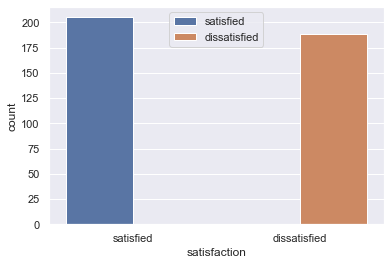

In [ ]:
sns.countplot(data=view,x=view['satisfaction'],hue=view['satisfaction'])
plt.legend(loc='upper center')

In [ ]:
null=pd.DataFrame(DF.isnull().sum(),columns=['Null Values'])
null['%']=(DF.isna().sum()/len(DF)*100)
null = null[null['%'] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,%
Arrival Delay in Minutes,393,0.302587


In [ ]:
DF.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
DF.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### Looking for Duplicate Data

In [ ]:
DF.duplicated().sum()

0

### Label Encoding

In [ ]:
def preprocess_inputs(data):
    
    # Binary encoding
    DF['satisfaction'] = DF['satisfaction'].replace({
        'dissatisfied' : 0,'satisfied' : 1})
    
    DF['Gender'] = DF['Gender'].replace({
        'Female': 0,
        'Male': 1
    })
    DF['Customer Type'] = DF['Customer Type'].replace({
        'disloyal Customer': 0,
        'Loyal Customer': 1
    })
    DF['Type of Travel'] = DF['Type of Travel'].replace({
        'Personal Travel': 0,
        'Business travel': 1
    })
    DF['Class'] = DF['Class'].replace({
        'Eco': 0,
        'Eco Plus': 1,
        'Business': 2
    })
    
    return data

In [ ]:
DX = preprocess_inputs(DF)

In [ ]:
DX.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,65,0,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,1,47,0,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,1,15,0,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,1,60,0,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,1,70,0,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
nonbinary_columns = [column for column in DX.columns if len(DX[column].unique()) > 2]

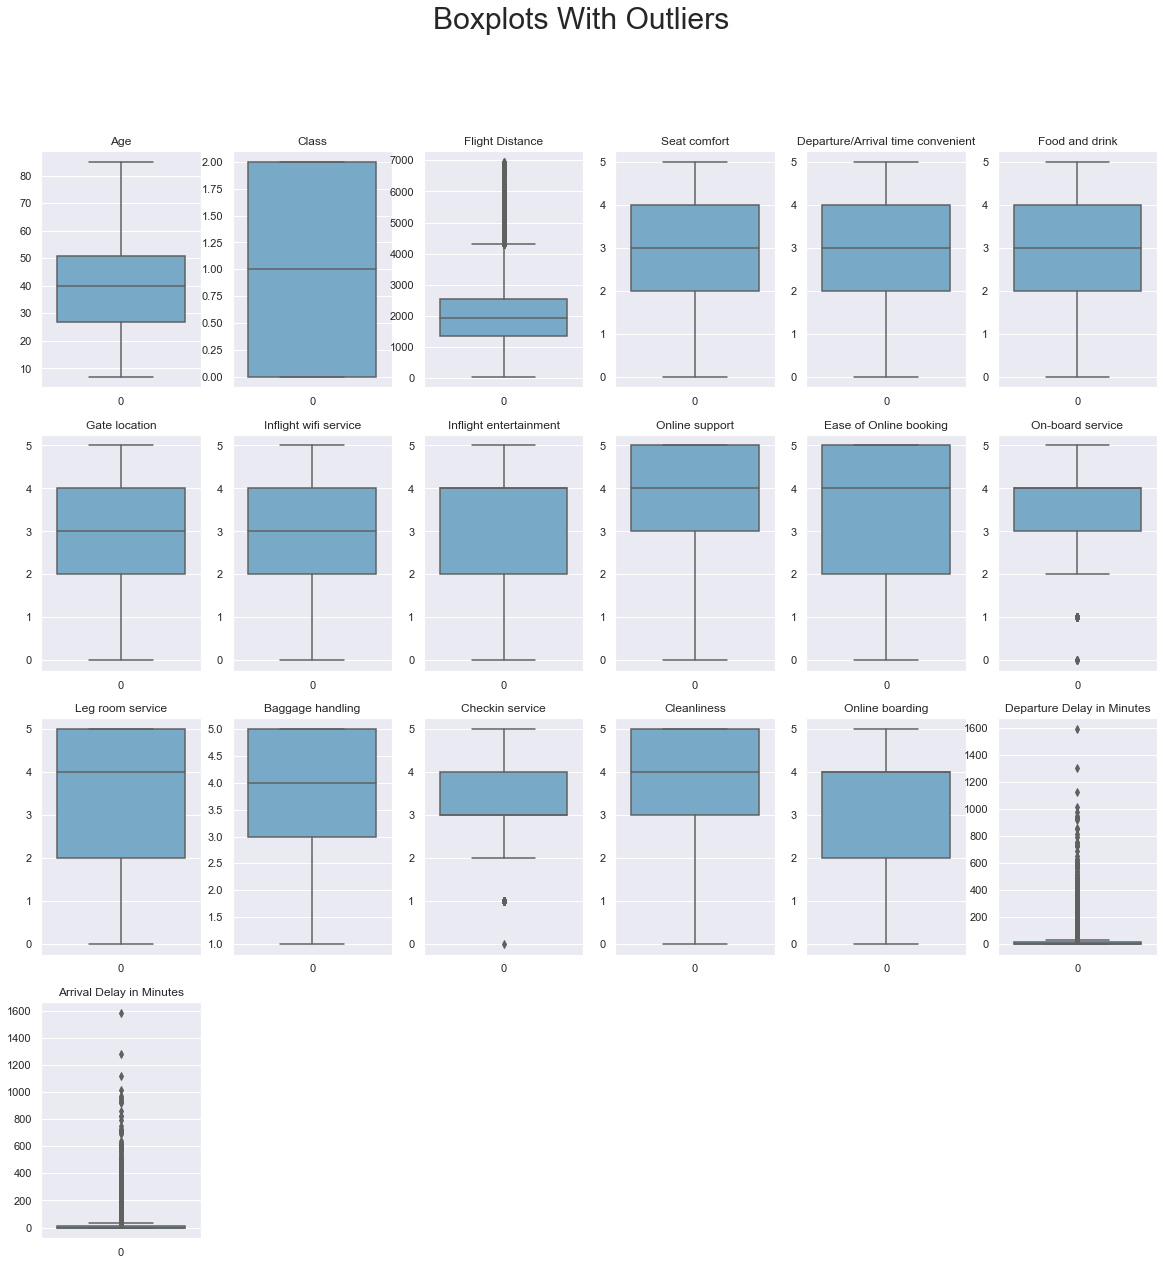

In [ ]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=DX[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots With Outliers', size=30)
plt.show()

#####  Correlation Heatmap

In [ ]:
DX.corr() # checking the correlation 

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,1.000000,-0.212050,0.292563,0.117913,0.108910,0.305574,-0.039133,0.242371,-0.015624,0.120568,...,0.389890,0.432017,0.352283,0.305115,0.260398,0.266089,0.259504,0.338118,-0.073960,-0.080691
Gender,-0.212050,1.000000,0.030803,0.008984,-0.009215,0.005732,0.120755,-0.072146,0.052043,-0.059051,...,-0.090267,-0.082231,-0.057008,-0.071369,-0.017006,-0.018529,-0.015334,-0.047470,0.003111,0.001309
Customer Type,0.292563,0.030803,1.000000,0.284275,-0.308210,0.105603,-0.019044,0.043023,0.186067,0.048893,...,0.186330,0.149863,0.085263,0.097245,0.000503,0.044352,0.002035,0.106556,-0.004131,-0.004730
Age,0.117913,0.008984,0.284275,1.000000,0.044910,0.140691,-0.249438,0.008475,0.038905,0.015496,...,0.121287,0.071728,0.066510,0.083684,-0.015554,0.031556,-0.018605,0.037948,-0.009263,-0.011248
Type of Travel,0.108910,-0.009215,-0.308210,0.044910,1.000000,0.545369,0.123183,-0.017327,-0.191501,0.031400,...,0.038982,0.025427,-0.035907,-0.014068,-0.048567,-0.057497,-0.058499,0.008899,0.006336,0.005830
Class,0.305574,0.005732,0.105603,0.140691,0.545369,1.000000,0.156896,-0.029771,-0.054446,0.049828,...,0.177971,0.128632,0.160732,0.125809,0.120395,0.129853,0.114514,0.097822,-0.009973,-0.014104
Flight Distance,-0.039133,0.120755,-0.019044,-0.249438,0.123183,0.156896,1.000000,-0.042476,0.001381,-0.004806,...,-0.031860,-0.022326,-0.032422,-0.030220,0.019653,0.002531,0.009391,0.009674,0.111608,0.110103
Seat comfort,0.242371,-0.072146,0.043023,0.008475,-0.017327,-0.029771,-0.042476,1.000000,0.434945,0.716008,...,0.120153,0.211576,0.121183,0.136161,0.118557,0.041265,0.108681,0.130365,-0.023842,-0.025506
Departure/Arrival time convenient,-0.015624,0.052043,0.186067,0.038905,-0.191501,-0.054446,0.001381,0.434945,1.000000,0.527575,...,-0.000470,0.001853,0.060104,0.029416,0.067201,0.062927,0.067021,-0.000495,0.004197,0.002599
Food and drink,0.120568,-0.059051,0.048893,0.015496,0.031400,0.049828,-0.004806,0.716008,0.527575,1.000000,...,0.028503,0.041150,0.038578,0.073975,0.036307,0.011912,0.033313,0.013620,-0.013375,-0.014881


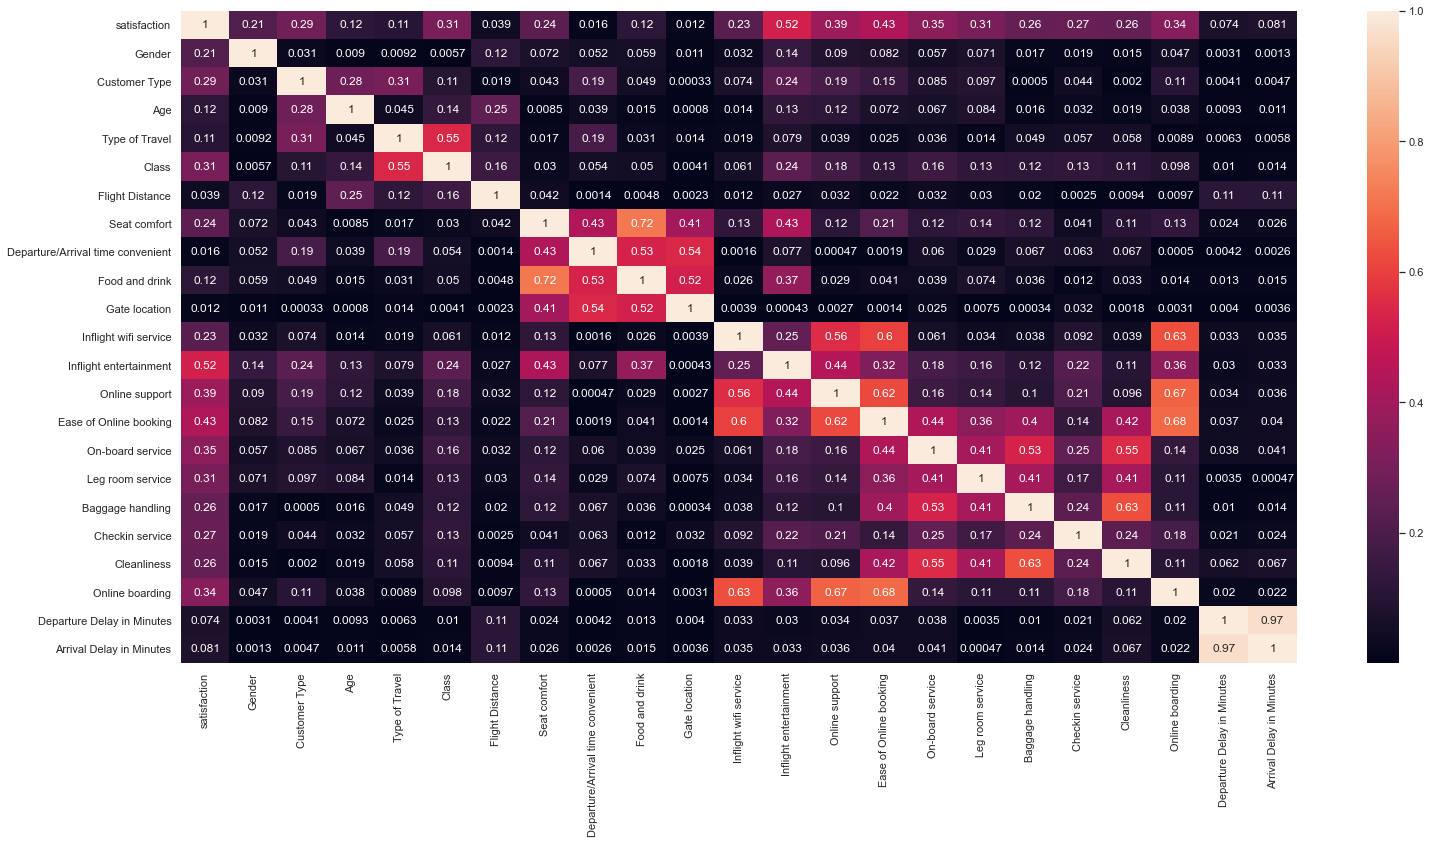

In [ ]:
fig, ax = plt.subplots(figsize = (25,12))
sns.heatmap(abs(DX.corr()), annot = True); # ploting the correlation heat map using seaborn

In [ ]:
# Droping the Column Departure Delay because of high correlation with Arrival delay

DX = DX.drop('Departure Delay in Minutes',axis=1)

### Outlier Removal

In [ ]:
print(f'Row counts before removing outlier: {len(DX)}')

filtered_entries = np.array([True] * len(DX))
for col in ['Checkin service','On-board service']:
    Q1 = DX[col].quantile(0.25)
    Q3 = DX[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((DX[col] >= low_limit) & (DX[col] <= high_limit)) & filtered_entries
    
DX = DX[filtered_entries]

print(f'Row counts after removing outlier: {len(DX)}')

Row counts before removing outlier: 129487
Row counts after removing outlier: 103862


#### Remove data by Tarmac Delay Rules

In [ ]:
print(f'Row counts before using Tarmac Delay Rules : {len(DX)}')

DX = DX.drop(DX[(DX['Arrival Delay in Minutes'] > 180)].index) # droping the values greater than 180

print(f'Row counts after using Tarmac Delay Rules : {len(DX)}')

Row counts before using Tarmac Delay Rules : 103862
Row counts after using Tarmac Delay Rules : 102856


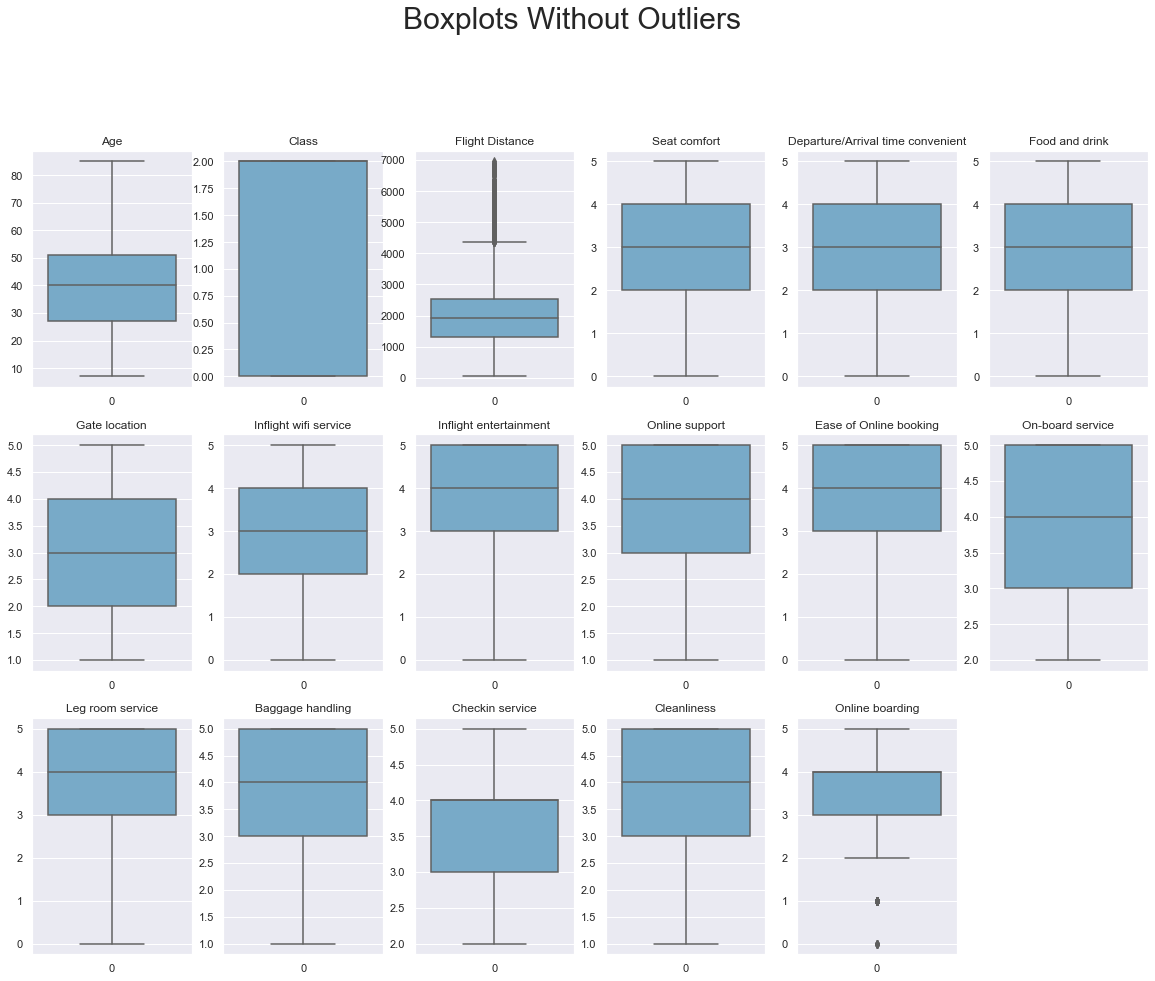

In [ ]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns[0:17]):
    plt.subplot(4, 6, i + 1)
    
    sns.boxplot(data=DX[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots Without Outliers', size=30)
plt.show()

#### Flattening the Continuos Data

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

#### Converting Age,Flight Distance,Arrival Dlay attributes to categorical data of 6 values

In [ ]:
Xbin = KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='quantile')

DX['Age'] = Xbin.fit_transform(DX[['Age']])


In [ ]:
Xbin = KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='uniform')

DX['Flight Distance'] = Xbin.fit_transform(DX[['Flight Distance']])

In [ ]:
Xbin = KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='uniform')

DX['Arrival Delay in Minutes'] = Xbin.fit_transform(DX[['Arrival Delay in Minutes']])

In [ ]:
DX.dtypes # checking for datatyp of all features

satisfaction                           int64
Gender                                 int64
Customer Type                          int64
Age                                  float64
Type of Travel                         int64
Class                                  int64
Flight Distance                      float64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Arrival Delay in Minutes             float64
dtype: obj

In [ ]:
DX.dtypes.value_counts()

int64      19
float64     3
dtype: int64

In [ ]:
# Converting datatype Float to int

DX["Age"] = DX["Age"].astype(np.int64)
DX["Flight Distance"] = DX["Flight Distance"].astype(np.int64)
DX["Arrival Delay in Minutes"] = DX["Arrival Delay in Minutes"].astype(np.int64)

In [ ]:
DX.dtypes.value_counts()

int64    22
dtype: int64

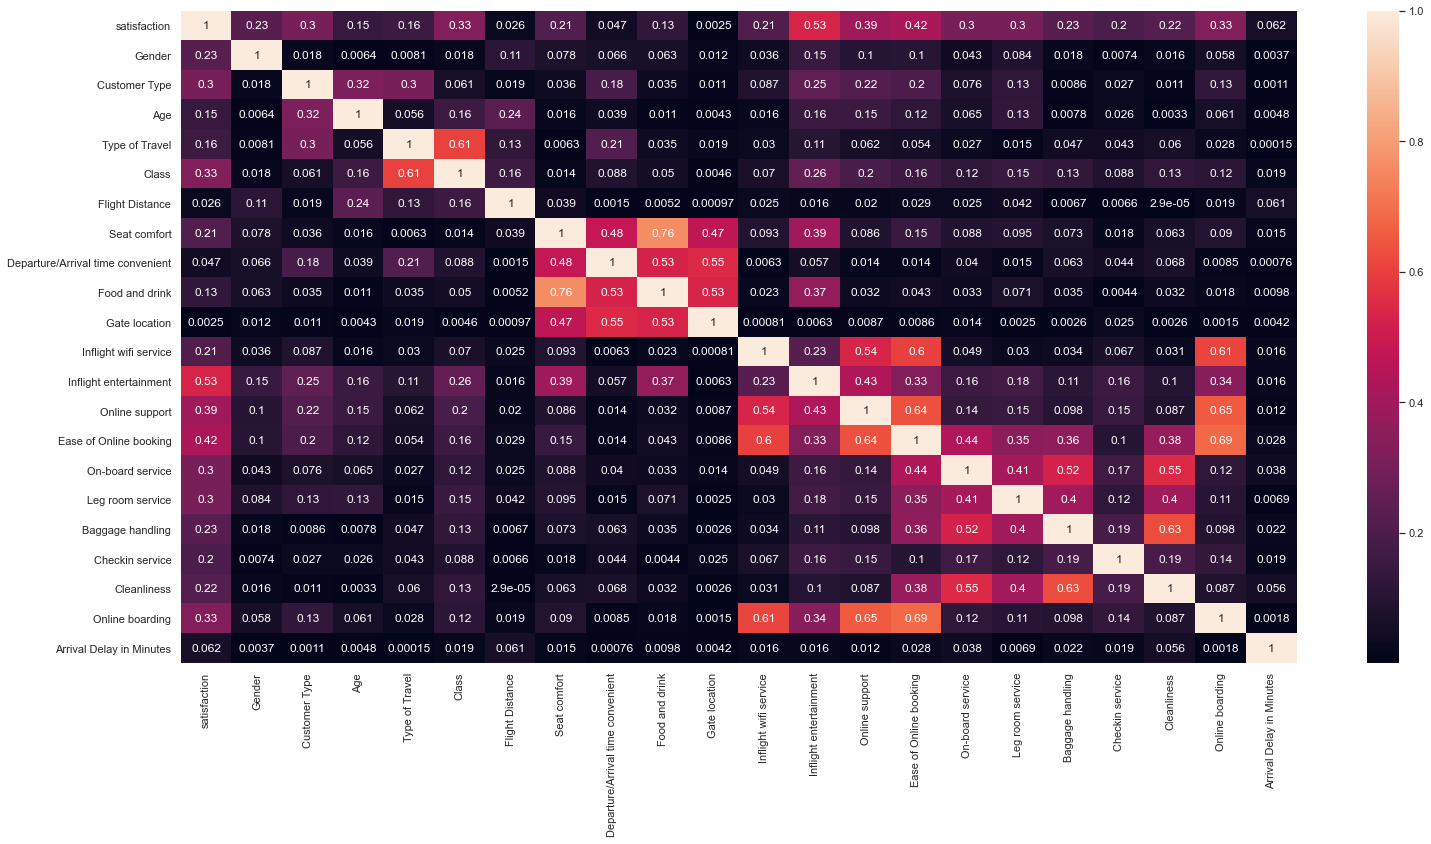

In [ ]:
fig, ax = plt.subplots(figsize = (25,12))
sns.heatmap(abs(DX.corr()), annot = True);

In [ ]:
CLN_DT = DX.copy() # creating a copy of the cleaned dataset

In [ ]:
CLN_DT.reset_index(drop=True, inplace=True)

In [ ]:
CLN_DT

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,1,0,1,5,0,0,0,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,1,0,1,0,0,0,1,0,0,0,...,0,2,2,3,3,4,4,4,2,0
2,1,0,1,5,0,0,0,0,0,0,...,3,4,2,2,0,2,4,2,5,0
3,1,1,1,1,0,0,1,0,0,0,...,0,2,2,5,4,5,5,4,2,0
4,1,0,1,5,0,0,0,0,0,0,...,5,5,5,5,0,5,5,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102851,1,0,0,2,0,0,2,5,4,5,...,5,2,2,4,5,4,4,3,2,0
102852,1,0,0,5,0,0,1,5,4,5,...,5,4,4,5,4,4,3,4,4,0
102853,1,0,0,0,0,0,2,5,5,5,...,5,2,2,3,5,3,5,4,2,0
102854,1,0,0,1,0,0,1,5,5,5,...,5,2,2,3,3,4,4,4,2,0


# Step 3, Model Building

Spliting of Target & Feature into two set

In [ ]:
y = CLN_DT['satisfaction'] # extracting the target feature from the entire dataset

In [ ]:
X = CLN_DT.drop('satisfaction',axis = 1,inplace = True) # creating a set of indipendent features by droping the target feature

In [ ]:
X = CLN_DT

In [ ]:
X.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,0,1,5,0,0,0,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0


### Train test Split

70% Data on training and 30% on testing

In [ ]:
# spliting the train, test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# showing the sie of train and test set

print('size of XTrain :',X_train.shape)
print('size of XTest :',X_test.shape)
print('size of yTrain :',y_train.shape)
print('size of yTet :',y_test.shape)

size of XTrain : (71999, 21)
size of XTest : (30857, 21)
size of yTrain : (71999,)
size of yTet : (30857,)


### Setting a Baseline For Classifier ML Model

In [ ]:
# importing the dummy classifier for predicting the baseline score 

from sklearn.dummy import DummyClassifier

#### Showing a base score of this dataset, we can use this to a baseline score for our Models

In [ ]:
# creating an instance of dummyclassifier
dummy_clf=DummyClassifier(strategy='stratified')

# train the dummyclassifier by fitting the X and y 
dummy_clf.fit(X_train,y_train)

# Generating the prediction
dummy_clf.score(X_train,y_train)

0.5220628064278671

#### creating a dataframe to store model scores 

In [ ]:
# create an empty dataframe

Log = pd.DataFrame(columns=['Model','AUC Score','Accuracy','Precision','Recall','F1_Score'])

In [ ]:
# This log is to store the different scores of each Model we are going to use

Log

,Model,AUC Score,Accuracy,Precision,Recall,F1_Score


In [ ]:
# creting a single function for all model

def model(model,name):    
    
    model.fit(X_train, y_train)   # train the model by using the X and y
    y_pred = model.predict(X_test)   
    probs = model.predict_proba(X_test)[:,1]  # predicting the probabilities

    print('\n')
    print('Evaluate model: {}'.format(name))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print('AUC: '+str(round(auc*100,2))+'%') # printing the AUC score

    accuracy = metrics.accuracy_score(y_test, y_pred) 
    print('accuracy: '+str(round(accuracy*100,2))+'%') # printing the accuracy
    
    precision = metrics.precision_score(y_test, y_pred)
    print('precision: '+str(round(precision*100,2))+'%') # printing the pricision
        
    recall = metrics.recall_score(y_test, y_pred)
    print('recall: '+str(round(recall*100,2))+'%') # printing the recall score

    f1_score = metrics.f1_score(y_test, y_pred) 
    print('f1_score: '+str(round(f1_score*100,2))+'%') # printing the f1_score
    
    errors = abs(y_pred - y_test) # calculating the mean absolute error

    print('Mean Absolute Error:',round(np.mean(errors),2), 'degrees.')
    
    print('\n')
    
    cm=confusion_matrix(y_test, y_pred)
    print('Confusion Matrix \n',cm)
    
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues') # ploting the confusion matrix
    
    print('\n Classification Report \n')
    print(classification_report(y_test,y_pred)) # showing the classification report
    
    print('\n\n')
    
    # ploting the ROC curve 
    
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(8,8))
    plt.plot(fpr,tpr,label= name+'(area = %0.2f)' %roc_auc)
    plt.plot([0, 1],[0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Charateristic')
    plt.legend(loc="lower right")
    plt.savefig(name+'_ROC_AUC')
    plt.show()
    
    print('\n\n')
    global Log  
    print('Performance Log')
    
    # appending all the scores into the Dataframe,Log
    
    Log = Log.append({'Model': name, 'AUC Score': str(round(auc*100,2))+'%', 
                          'Accuracy': str(round(accuracy*100,2))+'%','Precision':str(round(precision*100,2))+'%', 
                         'Recall':str(round(recall*100,2))+'%','F1_Score':str(round(f1_score*100,2))+'%'},
                        ignore_index=True)
    print(Log)

<hr style="height:1px;color:gray;">

### 1. Logistic Regression

<hr style="height:1px;color:gray;">

In [ ]:
# intialize Logistic Regression

LR = LogisticRegression(random_state=42,penalty='elasticnet',solver='saga',max_iter=15,l1_ratio=0)



Evaluate model: Logistic Rgression
AUC: 91.5%
accuracy: 84.31%
precision: 86.38%
recall: 87.94%
f1_score: 87.15%
Mean Absolute Error: 0.16 degrees.


Confusion Matrix 
 [[ 9589  2590]
 [ 2253 16425]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     12179
           1       0.86      0.88      0.87     18678

    accuracy                           0.84     30857
   macro avg       0.84      0.83      0.83     30857
weighted avg       0.84      0.84      0.84     30857






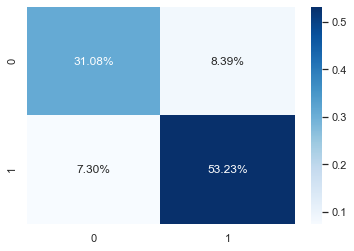

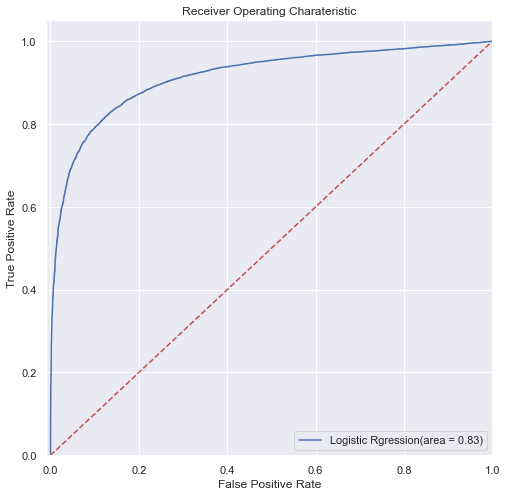




Performance Log
                Model AUC Score Accuracy Precision  Recall F1_Score
0  Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%


In [ ]:
model(LR,'Logistic Rgression') # calling the function for building the model and prdicting scores

<hr style="height:1px;color:gray;">

###  2.Decision Tree Classifier

<hr style="height:1px;color:gray;">

In [ ]:
DT = DecisionTreeClassifier(random_state = 42) # instantiate Decision Tree Classifier



Evaluate model: Decision Tree Classifier
AUC: 93.76%
accuracy: 94.11%
precision: 94.89%
recall: 95.4%
f1_score: 95.14%
Mean Absolute Error: 0.06 degrees.


Confusion Matrix 
 [[11220   959]
 [  860 17818]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12179
           1       0.95      0.95      0.95     18678

    accuracy                           0.94     30857
   macro avg       0.94      0.94      0.94     30857
weighted avg       0.94      0.94      0.94     30857






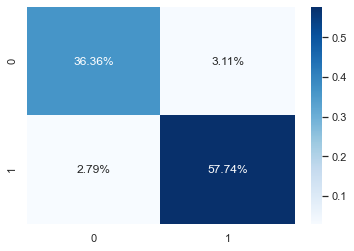

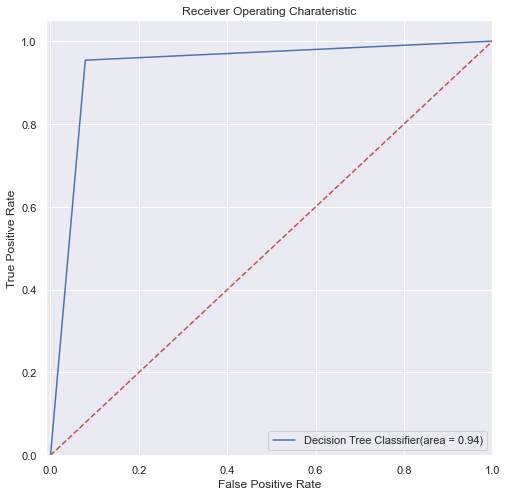




Performance Log
                      Model AUC Score Accuracy Precision  Recall F1_Score
0        Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1  Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%


In [ ]:
model(DT,'Decision Tree Classifier') # calling the function for modl building and prdicting scores

<hr style="height:1px;color:gray;">

### 3. Random Forest Classifier

<hr style="height:1px;color:gray;">

In [ ]:
RFC = RandomForestClassifier(random_state = 42) # initialise Randomforest classifier



Evaluate model: Random Forest Classifier
AUC: 99.28%
accuracy: 95.82%
precision: 96.99%
recall: 96.07%
f1_score: 96.53%
Mean Absolute Error: 0.04 degrees.


Confusion Matrix 
 [[11622   557]
 [  734 17944]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12179
           1       0.97      0.96      0.97     18678

    accuracy                           0.96     30857
   macro avg       0.96      0.96      0.96     30857
weighted avg       0.96      0.96      0.96     30857






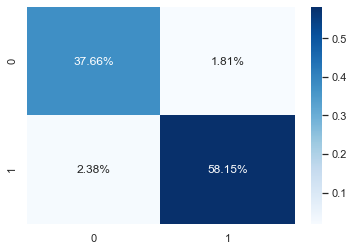

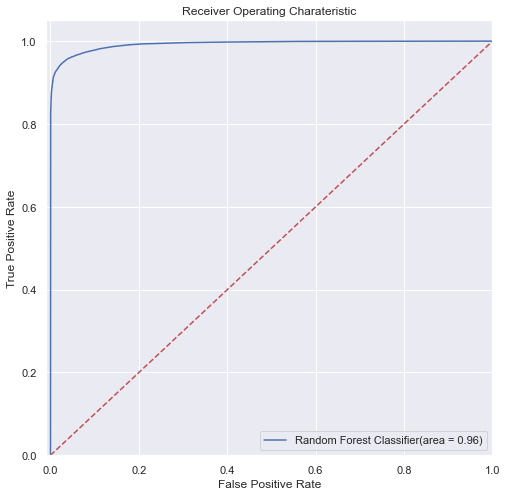




Performance Log
                      Model AUC Score Accuracy Precision  Recall F1_Score
0        Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1  Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2  Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%


In [ ]:
model(RFC,'Random Forest Classifier') # calling the function for model building and prdicting scores

<hr style="height:1px;color:gray;">

### 4 Gaussian Naive Bayes

<hr style="height:1px;color:gray;">

In [ ]:
GNB = GaussianNB() # initialising Guassian Naive Bayes



Evaluate model: Gaussian Naive Bayes
AUC: 90.23%
accuracy: 82.43%
precision: 86.53%
recall: 84.06%
f1_score: 85.28%
Mean Absolute Error: 0.18 degrees.


Confusion Matrix 
 [[ 9734  2445]
 [ 2977 15701]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     12179
           1       0.87      0.84      0.85     18678

    accuracy                           0.82     30857
   macro avg       0.82      0.82      0.82     30857
weighted avg       0.83      0.82      0.82     30857






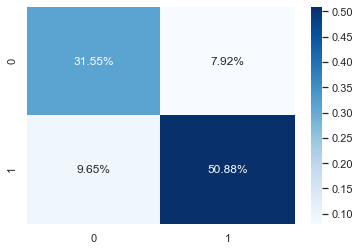

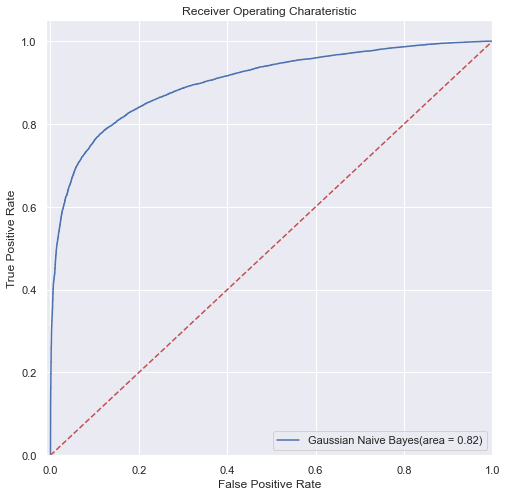




Performance Log
                      Model AUC Score Accuracy Precision  Recall F1_Score
0        Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1  Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2  Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3      Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%


In [ ]:
model(GNB,'Gaussian Naive Bayes') # calling the function for model building and prdicting scores

<hr style="height:1px;color:gray;">

### 5. KNeighbors Classifer

<hr style="height:1px;color:gray;">

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)



Evaluate model: KNeighbors Classifier
AUC: 97.22%
accuracy: 92.65%
precision: 94.8%
recall: 92.95%
f1_score: 93.87%
Mean Absolute Error: 0.07 degrees.


Confusion Matrix 
 [[11227   952]
 [ 1316 17362]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12179
           1       0.95      0.93      0.94     18678

    accuracy                           0.93     30857
   macro avg       0.92      0.93      0.92     30857
weighted avg       0.93      0.93      0.93     30857






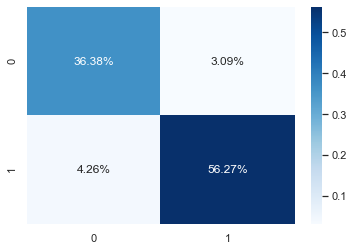

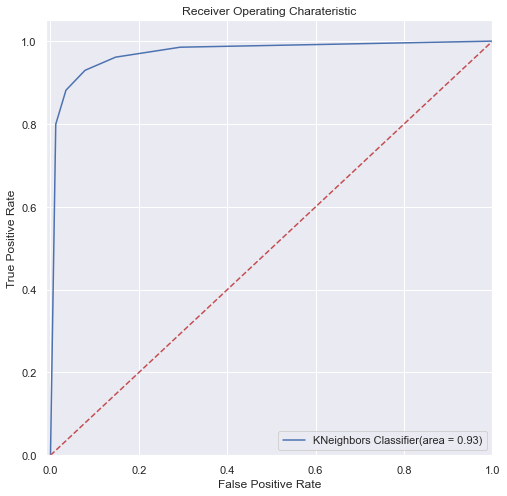




Performance Log
                      Model AUC Score Accuracy Precision  Recall F1_Score
0        Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1  Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2  Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3      Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%
4     KNeighbors Classifier    97.22%   92.65%     94.8%  92.95%   93.87%


In [ ]:
model(KNN,'KNeighbors Classifier')

<hr style="height:1px;color:gray;">

### 6. GradientBoosting

<hr style="height:1px;color:gray;">

In [ ]:
GBC = GradientBoostingClassifier(loss='deviance',n_estimators=1000,learning_rate=.2,criterion='friedman_mse')



Evaluate model: Gradient Boosting Classifier
AUC: 99.33%
accuracy: 95.67%
precision: 96.88%
recall: 95.94%
f1_score: 96.4%
Mean Absolute Error: 0.04 degrees.


Confusion Matrix 
 [[11601   578]
 [  759 17919]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12179
           1       0.97      0.96      0.96     18678

    accuracy                           0.96     30857
   macro avg       0.95      0.96      0.95     30857
weighted avg       0.96      0.96      0.96     30857






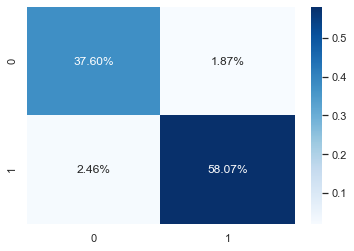

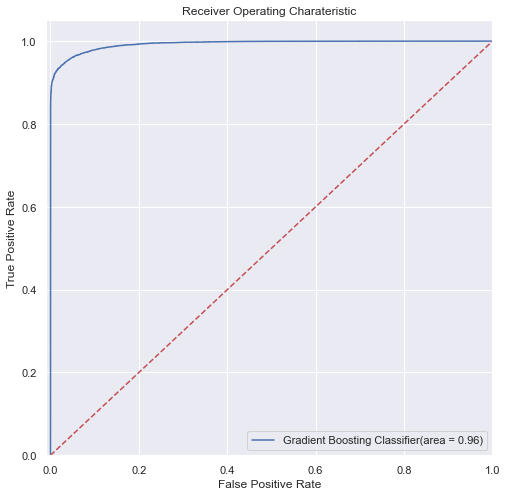




Performance Log
                          Model AUC Score Accuracy Precision  Recall F1_Score
0            Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1      Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2      Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3          Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%
4         KNeighbors Classifier    97.22%   92.65%     94.8%  92.95%   93.87%
5  Gradient Boosting Classifier    99.33%   95.67%    96.88%  95.94%    96.4%


In [ ]:
model(GBC,'Gradient Boosting Classifier')

<hr style="height:1px;color:gray;">

### 7. AdaBoostClassifier

<hr style="height:1px;color:gray;">

In [ ]:
ADB = AdaBoostClassifier(base_estimator=None,n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=42)



Evaluate model: AdaBoost Classifier
AUC: 96.7%
accuracy: 90.49%
precision: 92.08%
recall: 92.22%
f1_score: 92.15%
Mean Absolute Error: 0.1 degrees.


Confusion Matrix 
 [[10697  1482]
 [ 1453 17225]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12179
           1       0.92      0.92      0.92     18678

    accuracy                           0.90     30857
   macro avg       0.90      0.90      0.90     30857
weighted avg       0.90      0.90      0.90     30857






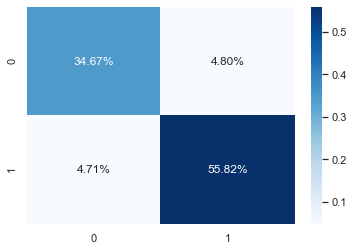

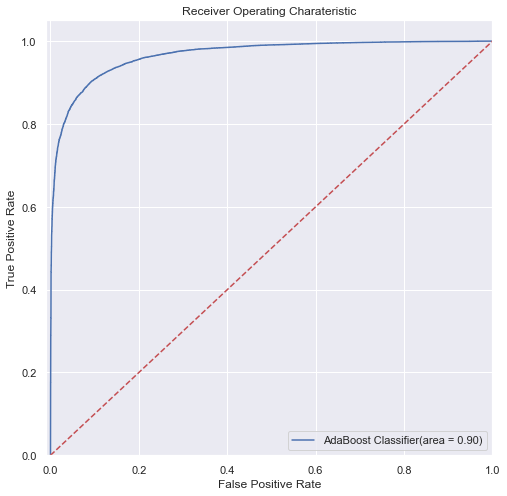




Performance Log
                          Model AUC Score Accuracy Precision  Recall F1_Score
0            Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1      Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2      Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3          Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%
4         KNeighbors Classifier    97.22%   92.65%     94.8%  92.95%   93.87%
5  Gradient Boosting Classifier    99.33%   95.67%    96.88%  95.94%    96.4%
6           AdaBoost Classifier     96.7%   90.49%    92.08%  92.22%   92.15%


In [ ]:
model(ADB,'AdaBoost Classifier')

<hr style="height:1px;color:gray;">

### 8. Xgboost Classifier

<hr style="height:1px;color:gray;">

In [ ]:
XGB = XGBClassifier(random_state=42)

[18:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Evaluate model: XGB Classifier
AUC: 99.39%
accuracy: 95.84%
precision: 97.07%
recall: 96.03%
f1_score: 96.54%
Mean Absolute Error: 0.04 degrees.


Confusion Matrix 
 [[11637   542]
 [  742 17936]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12179
           1       0.97      0.96      0.97     18678

    accuracy                           0.96     30857
   macro avg       0.96      0.96      0.96     30857
weighted avg       0.96      0.96      0.96     30857






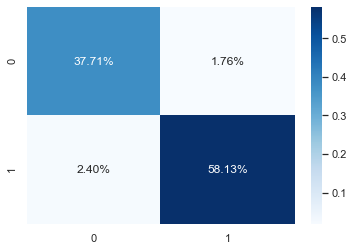

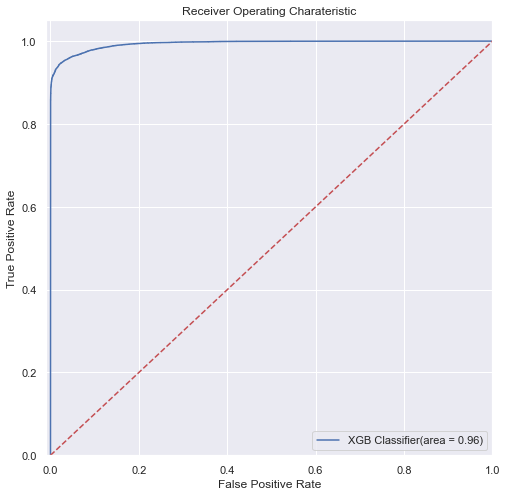




Performance Log
                          Model AUC Score Accuracy Precision  Recall F1_Score
0            Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1      Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2      Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3          Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%
4         KNeighbors Classifier    97.22%   92.65%     94.8%  92.95%   93.87%
5  Gradient Boosting Classifier    99.33%   95.67%    96.88%  95.94%    96.4%
6           AdaBoost Classifier     96.7%   90.49%    92.08%  92.22%   92.15%
7                XGB Classifier    99.39%   95.84%    97.07%  96.03%   96.54%


In [ ]:
model(XGB,'XGB Classifier')

In [ ]:

Log # showing the performance log of all models 

,Model,AUC Score,Accuracy,Precision,Recall,F1_Score
0,Logistic Rgression,91.5%,84.31%,86.38%,87.94%,87.15%
1,Decision Tree Classifier,93.76%,94.11%,94.89%,95.4%,95.14%
2,Random Forest Classifier,99.28%,95.82%,96.99%,96.07%,96.53%
3,Gaussian Naive Bayes,90.23%,82.43%,86.53%,84.06%,85.28%
4,KNeighbors Classifier,97.22%,92.65%,94.8%,92.95%,93.87%
5,Gradient Boosting Classifier,99.33%,95.67%,96.88%,95.94%,96.4%
6,AdaBoost Classifier,96.7%,90.49%,92.08%,92.22%,92.15%
7,XGB Classifier,99.39%,95.84%,97.07%,96.03%,96.54%


<hr style="height:1px;color:gray;">

### Hyper Parameter Tuning On XGB Classifier
<hr style="height:1px;color:gray;">

In [ ]:
# creating a List of Hyper-parameters will be tested

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    } 

In [ ]:
hyperparameters

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'gamma': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'tree_method': ['auto', 'exact', 'approx', 'hist'],
 'colsample_bytree': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'eta': [0.0,
  0.010101010101010102,
  0.020202020202020204,
  0.030303030303030304,
  0.04040404040404041,
  0.05050505050505051,
  0.06060606060606061,
  0.07070707070707072,
  0.08080808080808081,
  0.09090909090909091,
  0.10101010101010102,
  0.11111111111111112,
  0.12121212121212122,
  0.13131313131313133,
  0.14141414141414144,
  0.15151515151515152,
  0.16161616161616163,
  0.17171717171717174,
  0.18181818181818182,
  0.19191919191919193,
  0.20202020202020204,
  0.21212121212121213,
  0.22222222222222224,
  0.23232323232323235,


In [ ]:
# Initantiate XGB Classifier

XGB_HT = XGBClassifier(random_state=42, eval_metric='logloss')

# using randomisedearchcv to pass the parameters

XGB_tuned = RandomizedSearchCV(XGB_HT, hyperparameters, cv=5, random_state=42, scoring='recall')
XGB_tuned.fit(X_train,y_train) # train the model with X and y values

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=na...
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                              

In [ ]:
# displaying the best parameters

XGB_tuned.best_params_

{'tree_method': 'approx',
 'min_child_weight': 4,
 'max_depth': 50,
 'lambda': 0.6000000000000001,
 'gamma': 1.0,
 'eta': 0.31313131313131315,
 'colsample_bytree': 0.7000000000000001,
 'alpha': 0.6000000000000001}

In [ ]:
# building xgboost model with the best parameters

Xgboost = XGBClassifier(random_state=42, eval_metric='logloss',tree_method= 'approx',min_child_weight= 4,max_depth= 50, reg_lambda= 0.6000000000000001,gamma= 1.0,eta= 0.31313131313131315,colsample_bytree= 0.7000000000000001,alpha= 0.6000000000000001)
Xgboost.fit(X_train,y_train)

XGBClassifier(alpha=0.6000000000000001, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7000000000000001, enable_categorical=False,
              eta=0.31313131313131315, eval_metric='logloss', gamma=1.0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.313131303, max_delta_step=0, max_depth=50,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0.600000024,
              reg_lambda=0.6000000000000001, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, ...)



Evaluate model: XGBClassifier Hyper Tuned
AUC: 99.42%
accuracy: 95.86%
precision: 96.96%
recall: 96.17%
f1_score: 96.56%
Mean Absolute Error: 0.04 degrees.


Confusion Matrix 
 [[11615   564]
 [  715 17963]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12179
           1       0.97      0.96      0.97     18678

    accuracy                           0.96     30857
   macro avg       0.96      0.96      0.96     30857
weighted avg       0.96      0.96      0.96     30857






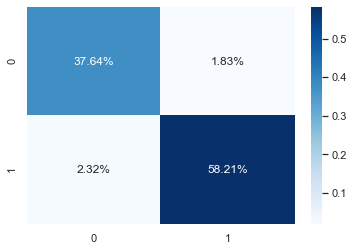

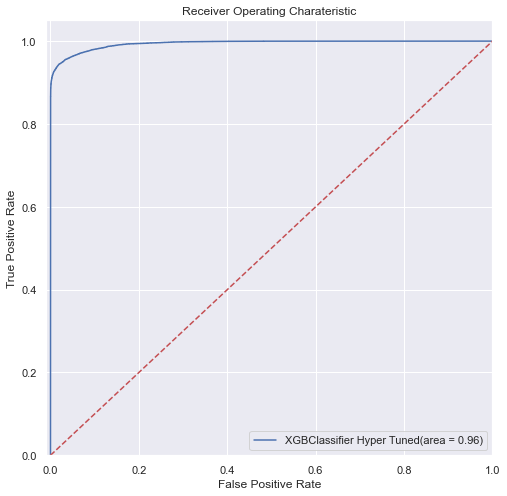




Performance Log
                          Model AUC Score Accuracy Precision  Recall F1_Score
0            Logistic Rgression     91.5%   84.31%    86.38%  87.94%   87.15%
1      Decision Tree Classifier    93.76%   94.11%    94.89%   95.4%   95.14%
2      Random Forest Classifier    99.28%   95.82%    96.99%  96.07%   96.53%
3          Gaussian Naive Bayes    90.23%   82.43%    86.53%  84.06%   85.28%
4         KNeighbors Classifier    97.22%   92.65%     94.8%  92.95%   93.87%
5  Gradient Boosting Classifier    99.33%   95.67%    96.88%  95.94%    96.4%
6           AdaBoost Classifier     96.7%   90.49%    92.08%  92.22%   92.15%
7                XGB Classifier    99.39%   95.84%    97.07%  96.03%   96.54%
8     XGBClassifier Hyper Tuned    99.42%   95.86%    96.96%  96.17%   96.56%


In [ ]:
# calling the  function for fiting the XGboost

model(Xgboost,'XGBClassifier Hyper Tuned')

In [ ]:
Xgboost.feature_importances_ # showing the features importance by XGBoost

array([0.05944434, 0.15607256, 0.00725344, 0.03567837, 0.03424293,
       0.0069284 , 0.14688316, 0.02039056, 0.06871887, 0.01880156,
       0.00908174, 0.18807748, 0.04932635, 0.09543822, 0.0142593 ,
       0.01309032, 0.01725567, 0.01550398, 0.01292855, 0.02251581,
       0.00810843], dtype=float32)

Text(0.5, 1.0, 'Feature Importance Score')

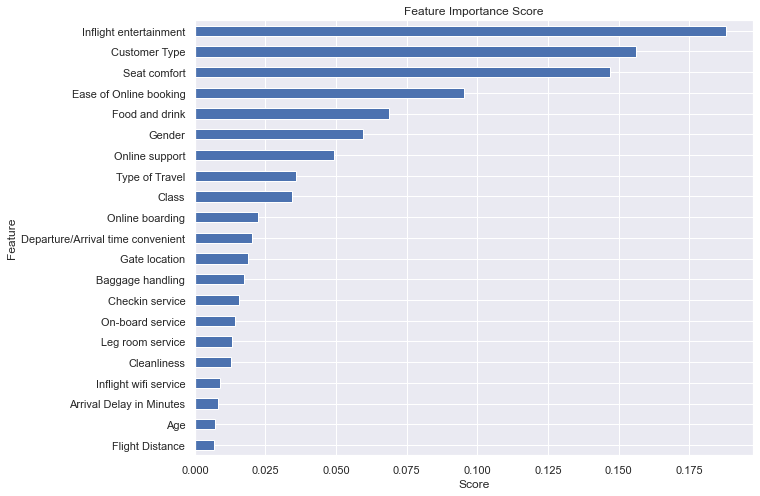

In [ ]:
# ploting a graph of importance of features affecting XGBoost Classifier

feat_importances = pd.Series(Xgboost.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')

In [ ]:
# printing the train & test accuracy

print('train accuracy : ', str(round(Xgboost.score(X_train, y_train),2)*100), '%')
print('test accuracy : ', str(round(Xgboost.score(X_test, y_test),2)*100), '%')

train accuracy :  99.0 %
test accuracy :  96.0 %


After using Machine Learning to analyze customer satisfaction, we find that XGBoost is the best machine learning model to predict our customer satisfaction data.

This model isn't Overfitting or Underfitting since the the accuracy differences between train and test data is just 3%.

There are 4 services that are highly affects customer satisfaction in this Airlines data :

Inflight Entertainment

Seat and Comfort

Ease of Online Booking

Food and Drink


In [ ]:
X.to_csv (r'D:\X.csv', index = False, header=True) # saving the dataframe X to csv format

In [ ]:
y.to_csv (r'D:\y.csv', index = False, header=True) # saving the dataframe y to csv format

In [ ]:
Log.to_csv(r'D:\log.csv', index = False, header=True) # saving the dataframe Log to csv format

In [ ]:
import pickle # importing pickle

In [ ]:
# pickling the XGBoost to a file and storing it for later use

file = open('xgb','wb')
pickle.dump(Xgboost,file)
file.close()

## Thank You